In [1]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import Image

In [2]:
from google.colab import files
upload=files.upload()

Saving Churn.xlsx to Churn (1).xlsx


#EDA

In [3]:
missing_values=['N/A',np.nan,'Nan']
data=pd.read_excel('Churn.xlsx',na_values=missing_values)

In [4]:
data

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,...,127,40.07,223.0,126,18.96,297.5,116,13.39,2,no
4996,4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,...,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,...,89,23.90,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,...,67,32.10,171.7,92,14.59,224.4,89,10.10,0,no


In [5]:
data.shape

(5000, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      4993 non-null   float64
 13  eve.mins        4976 non-null   float64
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [7]:
data.isnull().sum()

Unnamed: 0         0
state              0
area.code          0
account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

we can see that,given data has null values

In [8]:
data.columns.tolist()

['Unnamed: 0',
 'state',
 'area.code',
 'account.length',
 'voice.plan',
 'voice.messages',
 'intl.plan',
 'intl.mins',
 'intl.calls',
 'intl.charge',
 'day.mins',
 'day.calls',
 'day.charge',
 'eve.mins',
 'eve.calls',
 'eve.charge',
 'night.mins',
 'night.calls',
 'night.charge',
 'customer.calls',
 'churn']

In [9]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [10]:
data['area.code'].unique()

array(['area_code_415', 'area_code_408', 'area_code_510'], dtype=object)

In [11]:
data['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [12]:
data.describe().style.background_gradient(cmap='Accent_r')

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4993.000000,4976.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.258600,7.755200,10.261780,4.435200,2.771196,180.288900,100.029400,30.653501,200.580326,100.191000,17.054322,200.391620,99.919200,9.017732,1.570400
std,39.694560,13.546393,2.761396,2.456788,0.745514,53.894699,19.831197,9.166356,50.554637,19.826496,4.296843,50.527789,19.958686,2.273763,1.306363
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,24.430000,166.275000,87.000000,14.140000,166.900000,87.000000,7.510000,1.000000
50%,100.000000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000
75%,127.000000,17.000000,12.000000,6.000000,3.240000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,2.000000
max,243.000000,52.000000,20.000000,20.000000,5.400000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


we can see that most of the data is normally distributed.Now we will check correlation

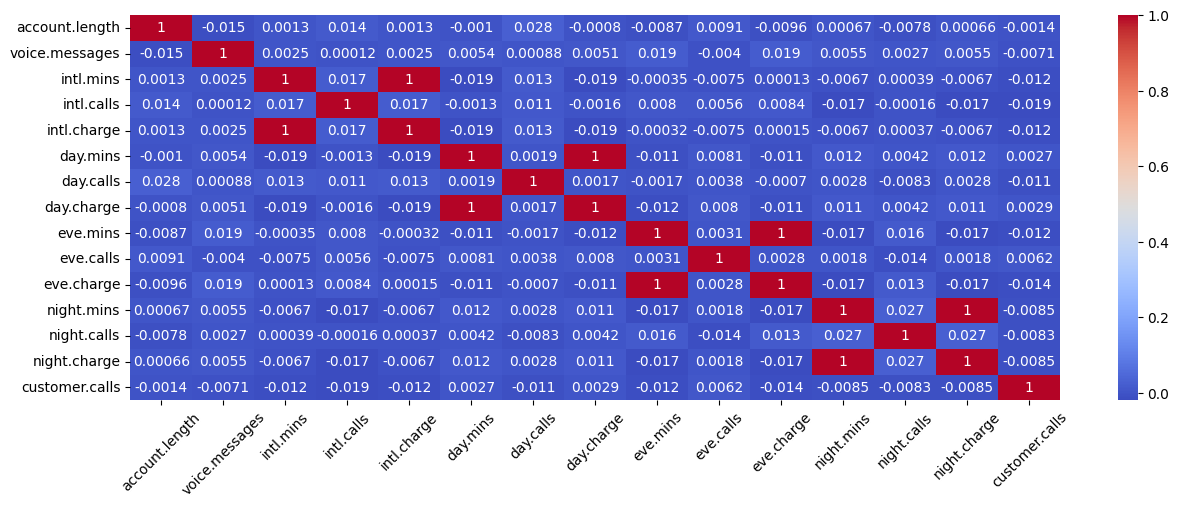

In [13]:
data_numeric = data.select_dtypes(include=['number'])
corr = data_numeric.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.xticks(rotation=45);

we can observe that we data has multi-colinearity

checking outliers

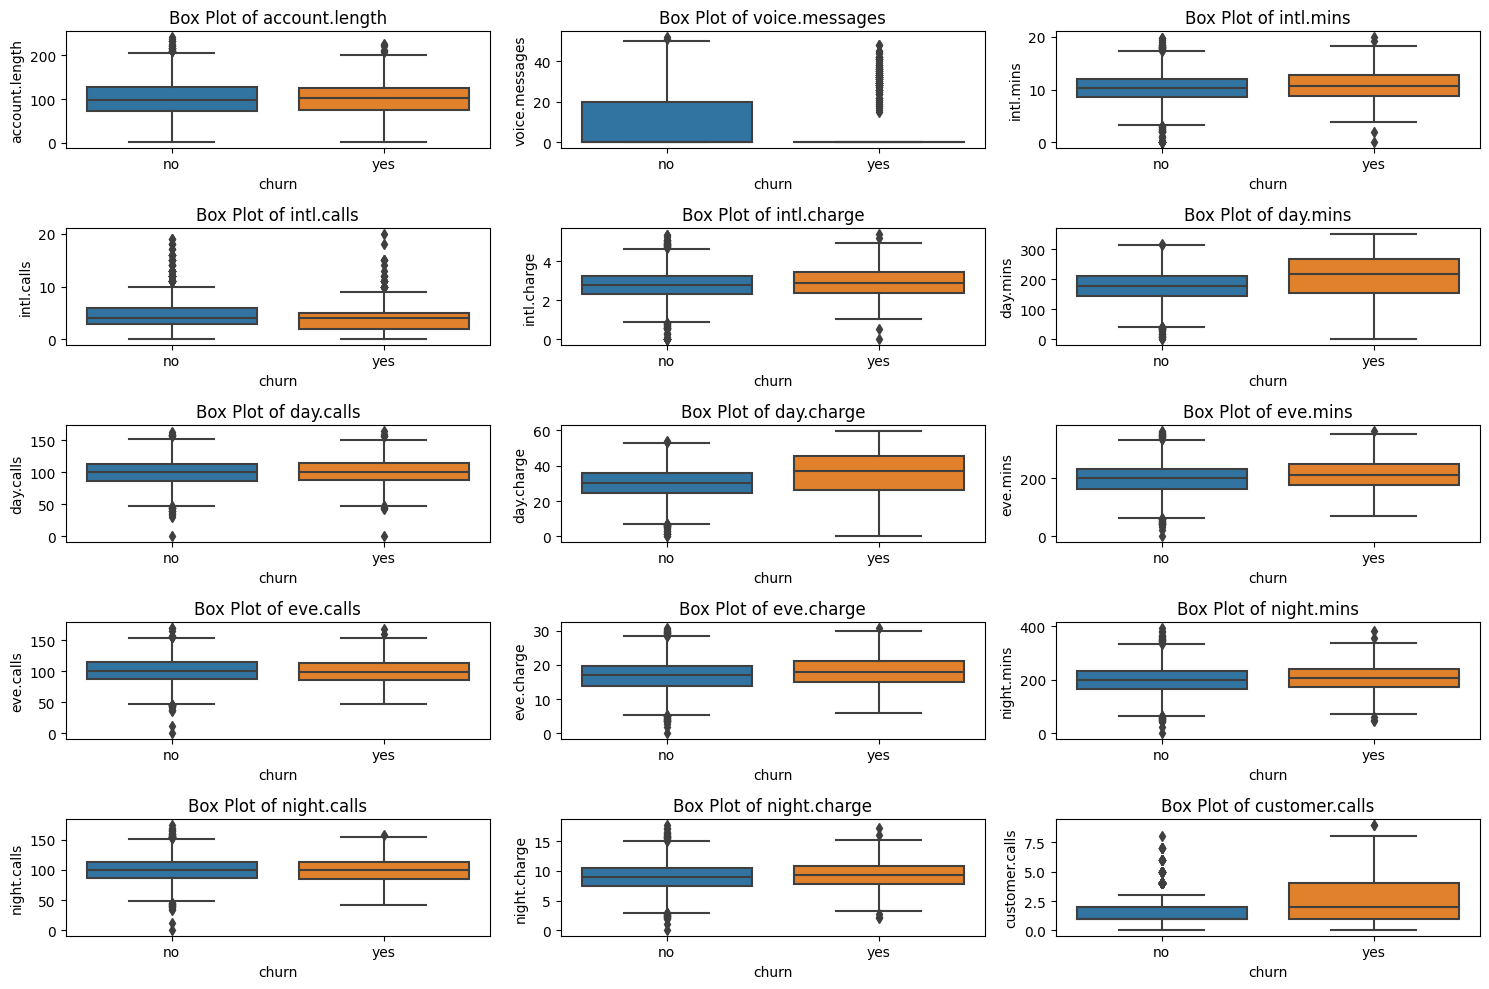

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['account.length', 'voice.messages', 'intl.mins', 'intl.calls', 'intl.charge',
                     'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge',
                     'night.mins', 'night.calls', 'night.charge', 'customer.calls']
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x='churn', y=column, data=data)
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()


In [15]:
from scipy import stats
z_scores = stats.zscore(data[numerical_columns])
threshold = 3
outliers = (abs(z_scores) > threshold).any(axis=1)
print("\033[1;31mRows with outliers:\033[0m")
data.loc[outliers]

Rows with outliers:


,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
22,AZ,area_code_415,130,no,0,no,9.5,19,2.57,183.0,112,31.11,72.9,99,6.20,181.8,78,8.18,0,no
32,LA,area_code_408,172,no,0,no,12.6,10,3.40,212.0,121,36.04,31.2,115,2.65,293.3,78,13.20,3,no
41,MD,area_code_408,135,yes,41,yes,14.6,15,3.94,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,0,yes
58,WI,area_code_415,68,no,0,no,12.1,3,3.27,148.8,70,25.30,246.5,164,20.95,129.8,103,5.84,3,no
115,ME,area_code_510,36,yes,42,yes,20.0,6,5.40,196.8,89,33.46,254.9,122,21.67,138.3,126,6.22,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4935,VA,area_code_408,149,yes,28,no,0.0,0,0.00,212.8,117,36.18,159.9,86,13.59,222.7,88,10.02,1,no
4949,MO,area_code_415,154,no,0,no,1.1,5,0.30,162.0,87,27.54,199.5,147,16.96,243.0,66,10.93,1,no
4976,KY,area_code_408,145,no,0,no,19.7,4,5.32,135.0,122,22.95,206.3,88,17.54,210.4,90,9.47,0,no
4981,NC,area_code_510,61,no,0,no,12.0,4,3.24,7.2,97,1.22,221.8,78,18.85,174.5,94,7.85,1,no


In [16]:
data = data.loc[~outliers]
print("Rows without outliers:")
data

Rows without outliers:


,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,NC,area_code_408,75,no,0,no,6.9,7,1.86,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,1,no
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,no
4996,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,no


In [17]:
columns = ['account.length', 'voice.messages', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge', 'night.mins', 'night.calls', 'night.charge', 'customer.calls']
fig = make_subplots(rows=len(columns) // 3 + 1, cols=3, subplot_titles=columns)
for i, column in enumerate(columns, start=1):
    row = (i - 1) // 3 + 1
    col = (i - 1) % 3 + 1
    histogram = px.histogram(data, x=column, title=f'Distribution of {column}')
    fig.add_trace(histogram['data'][0], row=row, col=col)
fig.update_layout(
    showlegend=False,
    height=len(columns) * 200,
    width=1800,
    title_text="Histogram Subplots"
)
fig.update_xaxes(title_text="X-Axis Label")
fig.update_yaxes(title_text="Count")

fig.show()


In [18]:
data.shape

(4743, 20)

we had removed the outliers which is having z-scores grreater than 3

In [19]:
data.isnull().sum()

state              0
area.code          0
account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

We can see that null values present in the data.To eliminate that we had use **KNNImputer**.

In [20]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=3)
data['day.charge']=imputer.fit_transform(data['day.charge'].values.reshape(-1,1))
data['eve.mins']=imputer.fit_transform(data['eve.mins'].values.reshape(-1,1))

<ipython-input-20-7c91e6d3e51f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-7c91e6d3e51f>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
data.isnull().sum()

state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

Now the data is cleaned

# VISUALIZATION

In [22]:
day_charge = data['day.charge'].mean()
eve_charge = data['eve.charge'].mean()
night_charge = data['night.charge'].mean()
international_charge=data['intl.charge'].mean()

In [23]:
charges = [day_charge, eve_charge, night_charge,international_charge]
charge_labels = ['Day Charge', 'Evening Charge', 'Night Charge','internatinal_charge']
df = pd.DataFrame({'Charge Type': charge_labels, 'Average Charge': charges})
fig = px.bar(df, x='Charge Type', y='Average Charge', color='Charge Type', labels={'Average Charge': 'Average Charge'})
fig.show()

In [24]:
day_mins=data['day.mins'].mean()
eve_mins=data['eve.mins'].mean()
night_mins=data['night.mins'].mean()
international_mins=data['intl.mins'].mean()

In [25]:
charges=[day_mins,eve_mins,night_mins,international_mins]
charge_labels=['Day_mins','Eve_mins','Night_Mins','International_Mins']
df1=pd.DataFrame({'Charge Type':charge_labels,'Average Mins':charges})
fig=px.bar(df1,x='Charge Type',y='Average Mins',color='Charge Type',labels={'Average Charge':'Average Charge'})
fig.show()

In [26]:
intl_calls=data['intl.calls'].mean()
day_calls=data['day.calls'].mean()
eve_calls=data['eve.calls'].mean()
night_calls=data['night.calls'].mean()

In [27]:
charges=[intl_calls,day_calls,eve_calls,night_calls]
charge_labels=['intl_calls','day_calls','eve_calls','night_calls']
df2=pd.DataFrame({'Charge Type':charge_labels,'Average Calls':charges})
fig=px.bar(df2,x='Charge Type',y='Average Calls',color='Charge Type',labels={'Average Calls':'Average Calls'})
fig.show()


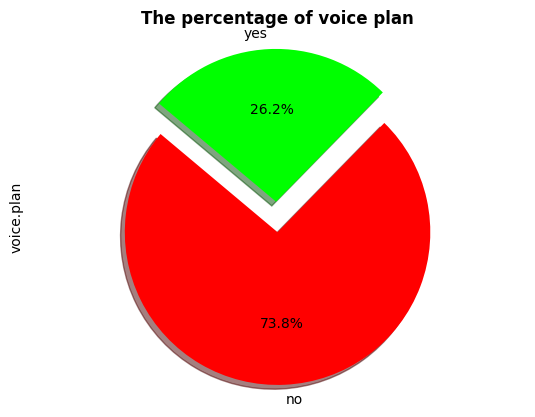

In [28]:
value_counts = data['voice.plan'].value_counts()
custom_colors = ['#FF0000', '#00FF00']
explode = (0.1, 0.1)
value_counts.plot(kind='pie', explode=explode, autopct='%1.1f%%', shadow=True, startangle=140, colors=custom_colors)
plt.title('The percentage of voice plan', weight='bold')
plt.axis('equal')
plt.show()


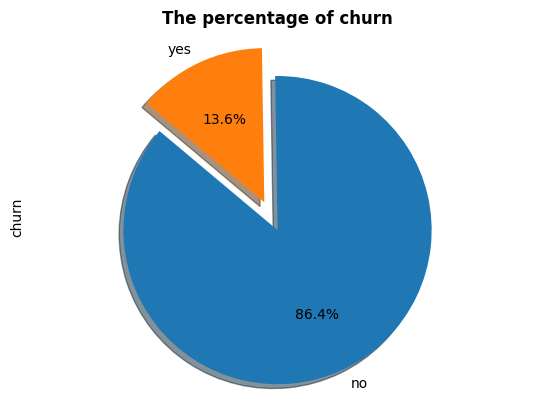

In [29]:
value_counts = data['churn'].value_counts()
explode = (0.1, 0.1)
value_counts.plot(kind='pie', explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('The percentage of churn', weight='bold')
plt.axis('equal')
plt.show()

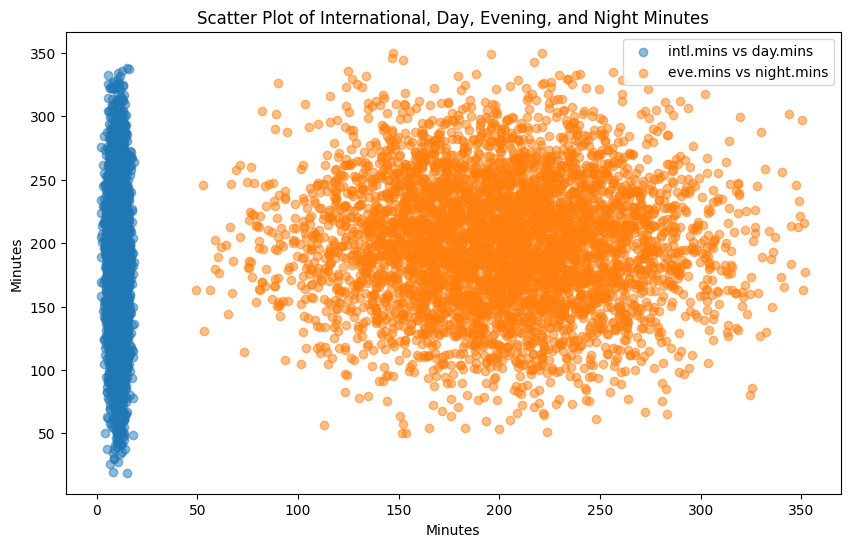

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(data['intl.mins'], data['day.mins'], label='intl.mins vs day.mins', alpha=0.5)
plt.scatter(data['eve.mins'], data['night.mins'], label='eve.mins vs night.mins', alpha=0.5)
plt.title('Scatter Plot of International, Day, Evening, and Night Minutes')
plt.xlabel('Minutes')
plt.ylabel('Minutes')
plt.legend()
plt.show()


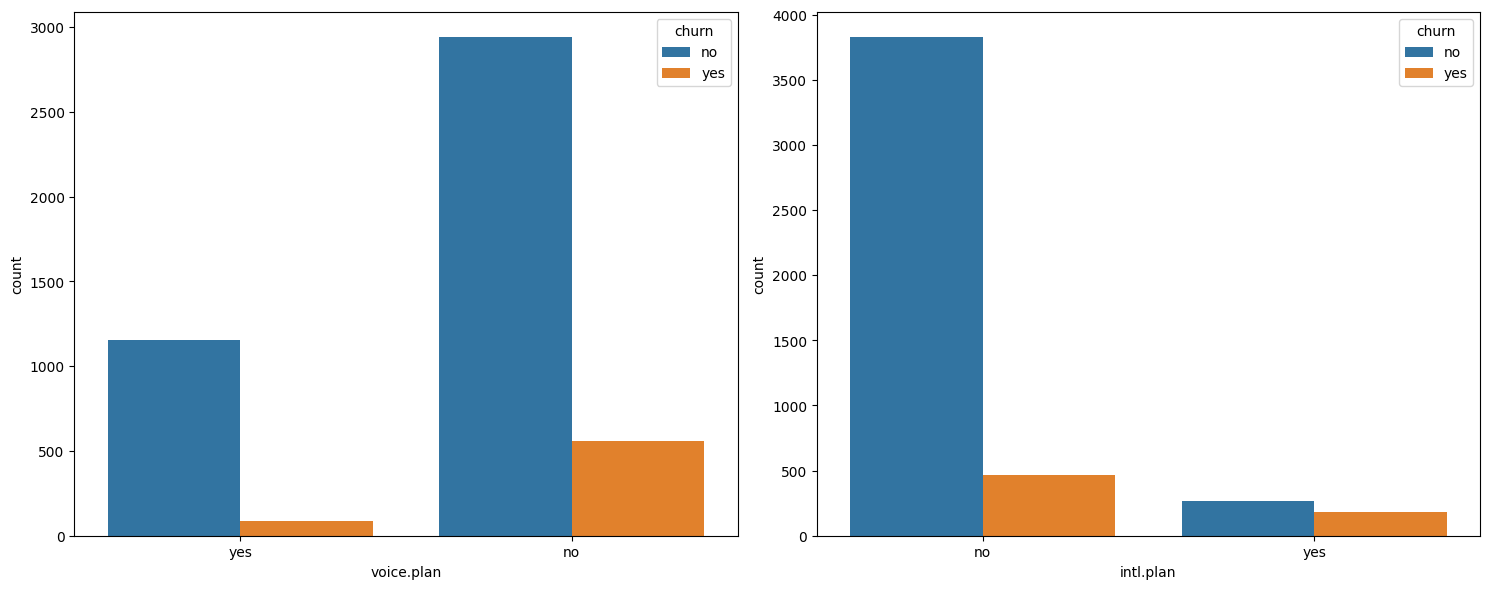

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.countplot(x='voice.plan', hue='churn', data=data, ax=axes[0])
sns.countplot(x='intl.plan', hue='churn', data=data, ax=axes[1])
plt.tight_layout()
plt.show()


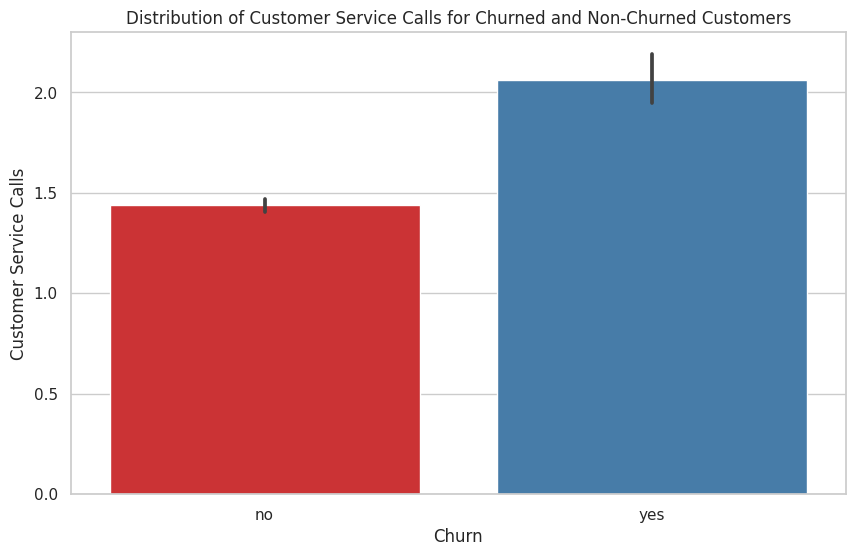

In [32]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="churn", y="customer.calls", data=data, palette="Set1")
plt.xlabel("Churn")
plt.ylabel("Customer Service Calls")
plt.title("Distribution of Customer Service Calls for Churned and Non-Churned Customers")
plt.show()


Mostly Customers left the Company due to Customer Service so here we can see that Customer Service is Wrost.

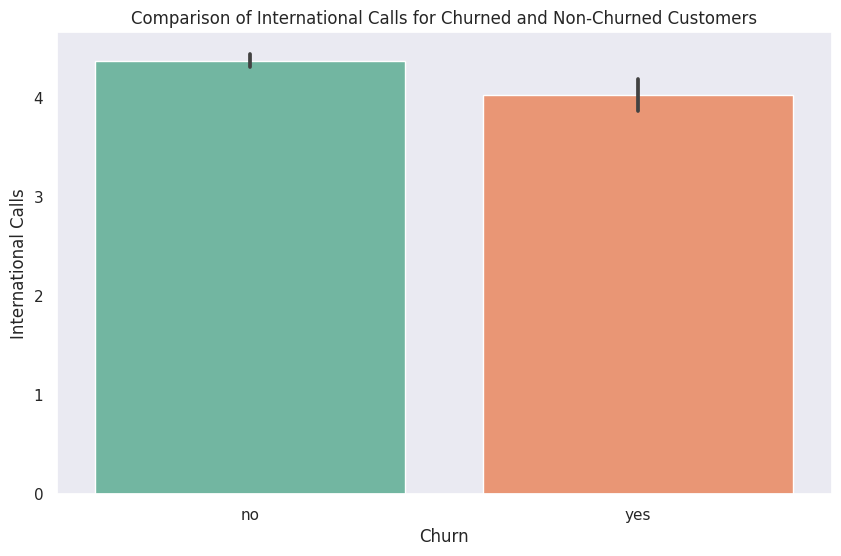

In [33]:
sns.set(style="dark")
plt.figure(figsize=(10, 6))
sns.barplot(x="churn", y="intl.calls", data=data, palette="Set2")
plt.xlabel("Churn")
plt.ylabel("International Calls")
plt.title("Comparison of International Calls for Churned and Non-Churned Customers")
plt.show()


Mostly customers didnt left the company with respect to International Calls

<Figure size 800x600 with 0 Axes>

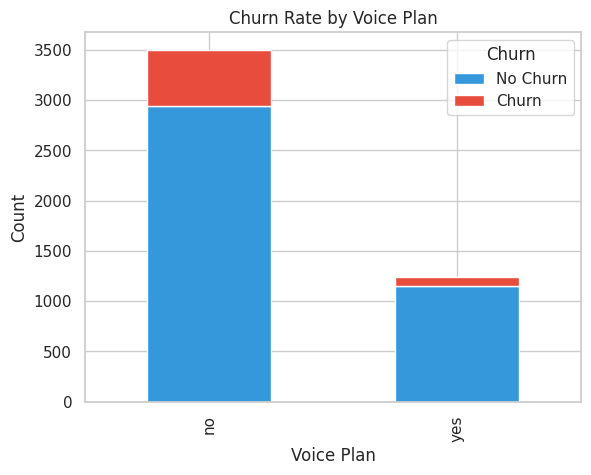

In [34]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
grouped_data = data.groupby(['voice.plan', 'churn']).size().unstack()
grouped_data.plot(kind='bar', stacked=True, color=["#3498db", "#e74c3c"])
plt.xlabel("Voice Plan")
plt.ylabel("Count")
plt.title("Churn Rate by Voice Plan")
plt.legend(title="Churn", loc="upper right", labels=["No Churn", "Churn"])
plt.show()

It shows that a higher number of customers without a voice plan did not churn compared to those with a voice plan. The number of customers who churned is relatively small for both categories but slightly higher for those without a voice plan.

<Figure size 800x600 with 0 Axes>

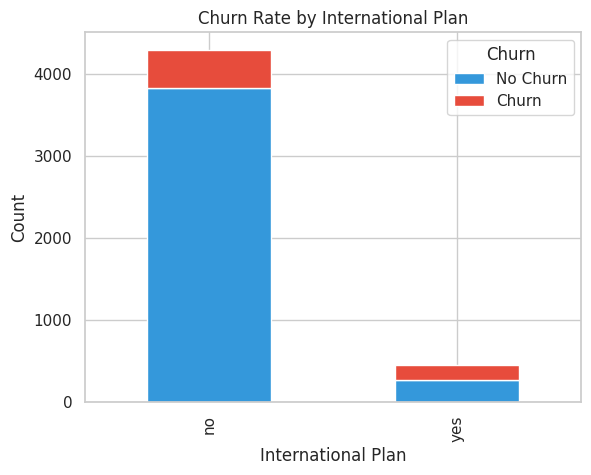

In [35]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
grouped_data = data.groupby(['intl.plan', 'churn']).size().unstack()
grouped_data.plot(kind='bar', stacked=True, color=["#3498db", "#e74c3c"])
plt.xlabel("International Plan")
plt.ylabel("Count")
plt.title("Churn Rate by International Plan")
plt.legend(title="Churn", loc="upper right", labels=["No Churn", "Churn"])
plt.show()

It shows that a higher number of customers without a International plan did not churn compared to those with a International plan. The number of customers who churned is relatively small for both categories but slightly higher for those without a International plan.

# Feature Engineering

In [36]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2

In [37]:
data

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,NC,area_code_408,75,no,0,no,6.9,7,1.86,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,1,no
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,no
4996,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,no


In [38]:
data

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,NC,area_code_408,75,no,0,no,6.9,7,1.86,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,1,no
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,no
4996,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,no


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4743 entries, 0 to 4998
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           4743 non-null   object 
 1   area.code       4743 non-null   object 
 2   account.length  4743 non-null   int64  
 3   voice.plan      4743 non-null   object 
 4   voice.messages  4743 non-null   int64  
 5   intl.plan       4743 non-null   object 
 6   intl.mins       4743 non-null   float64
 7   intl.calls      4743 non-null   int64  
 8   intl.charge     4743 non-null   float64
 9   day.mins        4743 non-null   float64
 10  day.calls       4743 non-null   int64  
 11  day.charge      4743 non-null   float64
 12  eve.mins        4743 non-null   float64
 13  eve.calls       4743 non-null   int64  
 14  eve.charge      4743 non-null   float64
 15  night.mins      4743 non-null   float64
 16  night.calls     4743 non-null   int64  
 17  night.charge    4743 non-null   f

In [40]:
columns=['state','area.code','voice.plan','intl.plan','churn']
le=LabelEncoder()
for i in columns:
  data[i]=le.fit_transform(data[i])

Recursive Feature Elimination (RFE) (1st technique)


In [41]:
import pandas as pd
X =data.drop(['churn'],axis=1)
y =data['churn']
model =RandomForestClassifier()
model.fit(X, y)
feature_importances=pd.DataFrame({'Columns':X.columns,'Importance':model.feature_importances_})
sorted_features=feature_importances.sort_values(by='Importance',ascending=False)
print(sorted_features)

           Columns  Importance
11      day.charge    0.146589
9         day.mins    0.140006
18  customer.calls    0.093798
5        intl.plan    0.087711
14      eve.charge    0.065486
12        eve.mins    0.061898
7       intl.calls    0.049477
8      intl.charge    0.041203
17    night.charge    0.039385
6        intl.mins    0.038742
15      night.mins    0.038235
4   voice.messages    0.029932
2   account.length    0.029688
10       day.calls    0.028386
16     night.calls    0.027890
13       eve.calls    0.025849
0            state    0.025193
3       voice.plan    0.022794
1        area.code    0.007741


SelectkBest (2st technique)


In [42]:
X = data.drop(['churn'], axis=1)
y = data['churn']
k_best = SelectKBest(chi2, k='all')
X_k_best = k_best.fit_transform(X, y)
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': k_best.scores_})
sorted_score = feature_scores.sort_values(by='Score', ascending=False)
print(sorted_score)


           Feature        Score
9         day.mins  3546.240513
4   voice.messages  1153.865652
11      day.charge   601.727542
12        eve.mins   527.018847
5        intl.plan   282.347802
18  customer.calls   143.191508
15      night.mins   123.124164
3       voice.plan    45.427690
14      eve.charge    45.119085
2   account.length    36.094881
7       intl.calls    15.384904
6        intl.mins    12.281429
10       day.calls     7.296393
17    night.charge     5.540626
8      intl.charge     3.314542
0            state     3.132912
16     night.calls     1.330711
13       eve.calls     1.070132
1        area.code     0.218016


***Boruta  (3rd technique)**

Iteratively compares feature importance with shadow features to identify relevant features.

In [43]:
!pip install boruta

In [44]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
model=RandomForestClassifier(max_depth=5)
boruta_selection=BorutaPy(model,n_estimators=10,verbose=3)
boruta_selection.fit(x.values,y.values)
feature_selection=x.columns[boruta_selection.support_].tolist()
print('features_selection :',feature_selection)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	10
Tentative: 	7
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	10
Tentative: 	7
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	10
Tentative: 	7
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	10
Tentative: 	7
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	11
Tentative: 	4
Rejected: 	4
Iteration: 	13 / 100
Confirmed: 	11
Tentative: 	4
Rejected: 	4
Iteration: 	14 / 100
Confirmed: 	11
Tentative: 	4
Rejected: 	4
Iteration: 	15 / 100
Confirmed: 	11
Tentative: 	4
Rejected: 	4
Iteration: 	16 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	6
I

In [45]:
feature_selection

['voice.plan',
 'voice.messages',
 'intl.plan',
 'intl.mins',
 'intl.calls',
 'intl.charge',
 'day.mins',
 'day.charge',
 'eve.mins',
 'eve.charge',
 'night.mins',
 'night.charge',
 'customer.calls']

**top 13 features**

you can tune the features


In [46]:
top_n_features_RFC = sorted_features.nlargest(13,'Importance')['Columns']
selected_features_RFC = X[top_n_features_RFC]
selected_features_RFC.columns

Index(['day.charge', 'day.mins', 'customer.calls', 'intl.plan', 'eve.charge',
       'eve.mins', 'intl.calls', 'intl.charge', 'night.charge', 'intl.mins',
       'night.mins', 'voice.messages', 'account.length'],
      dtype='object')

In [47]:
data

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,16,1,128,1,25,0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0
1,35,1,107,1,26,0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0
2,31,1,137,0,0,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0
3,35,0,84,0,0,1,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0
4,36,1,75,0,0,1,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,27,0,75,0,0,0,6.9,7,1.86,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,1,0
4995,11,0,50,1,40,0,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,0
4996,49,1,152,0,0,0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,1
4997,7,1,61,0,0,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,0


In [50]:

from sklearn.utils._param_validation import validate_parameter_constraints
from sklearn.utils import check_X_y, check_target_type
from sklearn.utils._validation import ArraysTransformer
from sklearn.utils._param_validation import HasMethods, Hidden
from imblearn.over_sampling import RandomOverSampler

X=data.iloc[:,:-1]
y=data.iloc[:,-1]
model=RandomOverSampler()
x,Y=model.fit_resample(X,y)
data1=pd.concat([pd.DataFrame(x,columns=X.columns),pd.Series(Y,name='churn')],axis=1)

ImportError: cannot import name 'check_target_type' from 'sklearn.utils' (/usr/local/lib/python3.10/dist-packages/sklearn/utils/__init__.py)

In [48]:
from imblearn.over_sampling import RandomOverSampler
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
model=RandomOverSampler()
x,Y=model.fit_resample(X,y)
data1=pd.concat([pd.DataFrame(x,columns=X.columns),pd.Series(Y,name='churn')],axis=1)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py)

# Model Building

In [ ]:
!pip install catboost

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from lightgbm.sklearn import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
X=data1.loc[:,['voice.plan','voice.messages','intl.plan','intl.mins','intl.calls','intl.charge','day.mins','day.charge','eve.mins','eve.charge','night.mins',
 'night.charge','customer.calls']]
y=data1.iloc[:,-1]

In [ ]:
data1['churn'].value_counts()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=200)

In [ ]:
models=[DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),GradientBoostingClassifier(),XGBClassifier(),LGBMClassifier(),GaussianNB(),MultinomialNB(),BernoulliNB(),AdaBoostClassifier(),CatBoostClassifier()]
results=pd.DataFrame(columns=['Model','Train Accuracy','Test Accuracy'])
for model in models:
  model_name=model.__class__.__name__
  model.fit(x_train,y_train)
  train_predictions=model.predict(x_train)
  test_predictions=model.predict(x_test)
  train_accuracy=accuracy_score(y_train,train_predictions)
  test_accuracy=accuracy_score(y_test,test_predictions)

  results = results.append({'Model': model_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    }, ignore_index=True)
  print(f'Classification Report {model_name}')
  print(classification_report(y_test,test_predictions))
  print('===========================================================================================')




In [ ]:
results['Rank']=results['Test Accuracy'].rank(ascending=False)
print(results)

In [ ]:
import plotly.express as px
fig=px.bar(results,x='Model',y='Test Accuracy',labels={'Test Accuracy':'Test Accuracy'},color='Rank')
fig.show()

After evaluating various models for telecom churn prediction, the RandomForest Classifier consistently demonstrated superior performance across multiple metrics.

 Its ability to capture intricate patterns and relationships within the telecom dataset makes it a robust choice for predicting customer churn.

 Random Forest can provide reliable insights and predictions.

#Finalizing the Random Forest Model for deployment


In [ ]:
pip install scikit-learn==1.3.0

In [ ]:
#model_RF = RandomForestClassifier()
#model_RF.fit(x_train,y_train)
#y_pred_test=model_RF.predict(x_test)
#test_accuracy=accuracy_score(y_test,y_pred_test)
#print('Test Accuracy:',test_accuracy)


In [ ]:
# Select features (X) and target variable (y)
X = data1.loc[:, ['voice.plan', 'voice.messages', 'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins',
                 'day.charge', 'eve.mins', 'eve.charge', 'night.mins', 'night.charge', 'customer.calls']]
y = data1.iloc[:, -1]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

# Train the RandomForestClassifier model
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

In [ ]:
with open("RandomForest_Churn_Model.pkl", "wb") as file:
    pickle.dump(rf_model, file)

In [51]:
import sklearn
print(sklearn.__version__)

1.3.0
